Final Centroids:
 [[6.90454712 7.14006205]
 [1.86432437 1.9279826 ]]


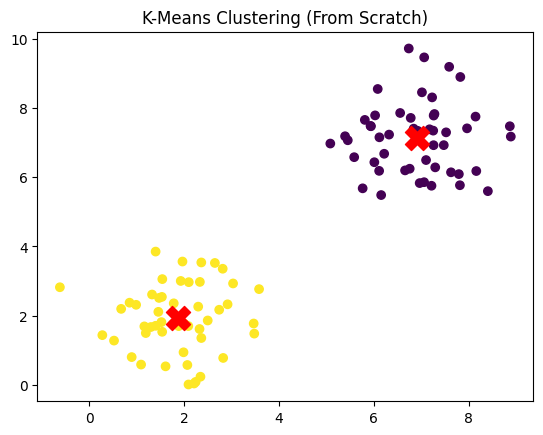

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

cluster_1 = np.random.randn(50, 2) + np.array([2, 2])
cluster_2 = np.random.randn(50, 2) + np.array([7, 7])

X = np.vstack([cluster_1, cluster_2])

class KMeansScratch:
    def __init__(self, K=2, max_iters=100):
        self.K = K
        self.max_iters = max_iters

    def fit(self, X):
        n_samples, n_features = X.shape
        random_idx = np.random.choice(n_samples, self.K, replace=False)
        self.centroids = X[random_idx]

        for _ in range(self.max_iters):
            self.clusters = self._create_clusters(X)
            centroids_old = self.centroids.copy()
            self.centroids = self._calculate_centroids(X)
            if self._is_converged(centroids_old, self.centroids):
                break

    def _create_clusters(self, X):
        clusters = [[] for _ in range(self.K)]
        for idx, point in enumerate(X):
            centroid_idx = self._closest_centroid(point)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, point):
        distances = np.linalg.norm(point - self.centroids, axis=1)
        return np.argmin(distances)

    def _calculate_centroids(self, X):
        centroids = np.zeros((self.K, X.shape[1]))
        for cluster_idx, cluster in enumerate(self.clusters):
            if cluster:  # avoid empty clusters
                centroids[cluster_idx] = np.mean(X[cluster], axis=0)
        return centroids

    def _is_converged(self, old, new):
        distances = np.linalg.norm(new - old, axis=1)
        return np.all(distances < 1e-4)

    def predict(self, X):
        labels = np.zeros(X.shape[0])
        for i, point in enumerate(X):
            labels[i] = self._closest_centroid(point)
        return labels
model = KMeansScratch(K=2, max_iters=100)
model.fit(X)

labels = model.predict(X)
centroids = model.centroids

print("Final Centroids:\n", centroids)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis")
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, color='red', marker='X')
plt.title("K-Means Clustering (From Scratch)")
plt.show()
